#the difference between clustering and classification: one is predictive and one is descriptive

# Lec 11.1 Machine learning 1
# Introduction
Machine Learning has emerged as an important tool accross the scientific diciplines. We allready have encountered machine learning in fitting lines to data in Lec 9.1. In the tutorial we covered, we split the data into a training set and a prediction set, a very common methodology in machine learning.
The most commonly used package for machine learning is scikit-learn, which we will play around with this week.
There are a number of types of machine learning algorithms, aka "estimators". Click on this link: https://scikit-learn.org/stable/tutorial/machine_learning_map/
These can be divided up into:
#1) Regression, which we did with line fitting. This involves finding the best fit parameters for some model.
#2) Clustering, which groups data by some similarity criterion (e.g., all large green birds vs. all small red birds)
#3) Dimensionality reduction, which breaks data, usually timesries data, into principle components. Fourier decomposition is an example of this
#4) Classification. What is the difference between this and clustering? Something about if you are trying to predict instead of just describe.
See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



# Exercises
To start, we are folling the tutorial here: https://www.dataquest.io/blog/sci-kit-learn-tutorial/
This goes through a number of estimator methods shallowly, but gives you a good idea of how to get your data in a state to interface with sklearn and how to use the different methods
Skip the visualization part and the end of the tutorial
Unless you want to fiddle around with trying to get yellowbrick installed
We will go over visualization next lecture



# TUTORIAL
https://www.dataquest.io/blog/sci-kit-learn-tutorial/

# Importing the data set
First we will import the pandas module and use a variable url to store the url from which the data set is to be downloaded.

In [2]:
#import necessary modules
import pandas as pd
#store the url in a variable
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"


Next, we will use the read_csv() method provided by the pandas module to read the csv file which contains comma separated values and convert that into a pandas DataFrame.

In [3]:
# Read in the data with `read_csv()`
sales_data = pd.read_csv(url)

In [4]:
# Using .head() method to view the first few records of the data set
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [5]:
# Using .tail() method to view the last few records of the data set
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


In [6]:
# using the dtypes() method to display the different datatypes available
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

### Data VIsualization
Now that we’ve done some basic data exploration, let’s try to create some nice plots to visually represent the data and uncover more stories hidden in the data set.

There are many python libraries that provide functions for doing data visualization; one such library is Seaborn. To use Seaborn plots, we should make sure that this python module is downloaded and installed.

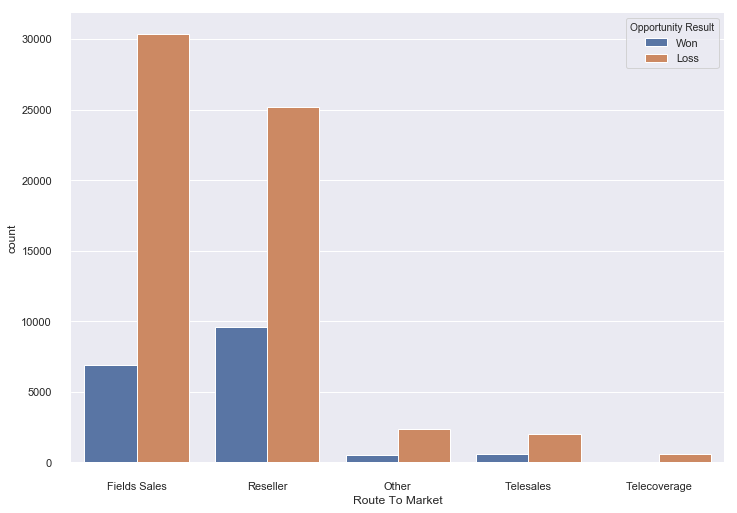

In [9]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# Remove the top and down margin
sns.despine(offset=10, trim=True)

# display the plot
plt.show()


Now that we’ve got Seaborn set up, let’s take a deeper look at what we just did.

First we imported the Seaborn module and the matplotlib module. The set() method in the next line helps to set different properties for our plot, like ‘styles’, ‘color’ etc. Using the sns.set(style="whitegrid", color_codes=True) code snippet we set the background of the plot to a light color. Then we set the plot size with the sns.set(rc={'figure.figsize':(11.7,8.27)})code snippet, which defines the plot figure size to be 11.7px and 8.27px.

Next, we create the plot using sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result'). The countplot() method helps us to create a countplot and it exposes several arguments to customize the countplot per our needs. Here, in the first argument of the countplot() method, we defined the X-axis as the column ‘Route To Market’ from our data set. The second argument is the data source, which in this case is the dataframe sales_data that we created in the first section of this tutorial. The third argument is the color of the barplots which we assigned to ‘blue’ for the label ‘won’ and ‘green’ for the label ‘loss’ from the ‘Opportunity Result’ column of the sales_data dataframe.

More details about Seaborn countplots can be found here.

So, what does the countplot tell us about the data? The first thing is that the data set has more records of the type ‘loss’ than records of the type ‘won’, as we can see from the size of the bars. Looking at the x axis and the corresponding bars for each label on the x axis, we can see that most of the data from our data set is concentrated towards the left side of the plot: towards the ‘Field Sales’ and ‘Reseller’ categories. Another thing to notice is that the category ‘Field Sales’ has more losses than the category ‘Reseller’.

We selected the Route To Market column for our plot because it seemed like it would provide helpful information after our initial study of the head() and tail() methods’ output. But other fields like ‘Region’ , ‘Supplies Group’ etc. can also be used to make plots in the same manner.



# E1. What does the despine function do? How useful is this?
It says the despine function removes the top and right spine from the graph. But I omitted the despine function and plotted again and got the same plot so I don't think it does very much

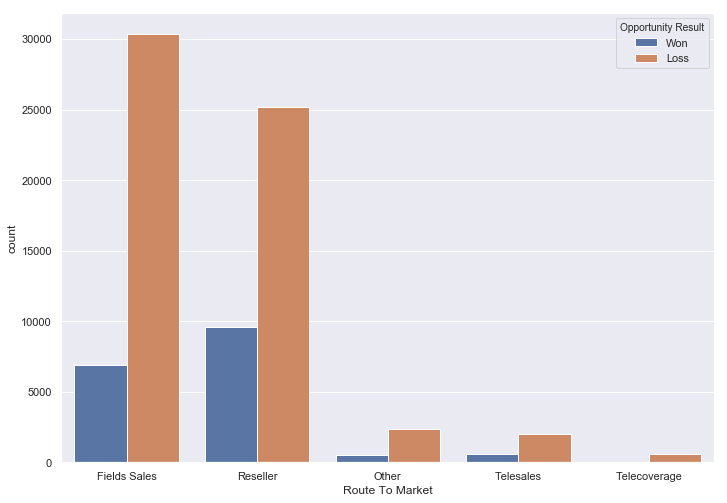

In [12]:

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# display the plot
plt.show()



### violin plot
Now that we have got a pretty good visualization of what our overall data looks like, let’s see what more information can we dig out with the help of other Seaborn plots. Another popular option is violinplots, so let’s create a violin plot and see what that style of plot can tell us.

We will use the violinplot() method provided by the Seaborn module to create the violin plot. Let’s first import the seaborn module and use the set() method to customize the size of our plot. We will seet the size of the plot as 16.7px by 13.27px:

In [10]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


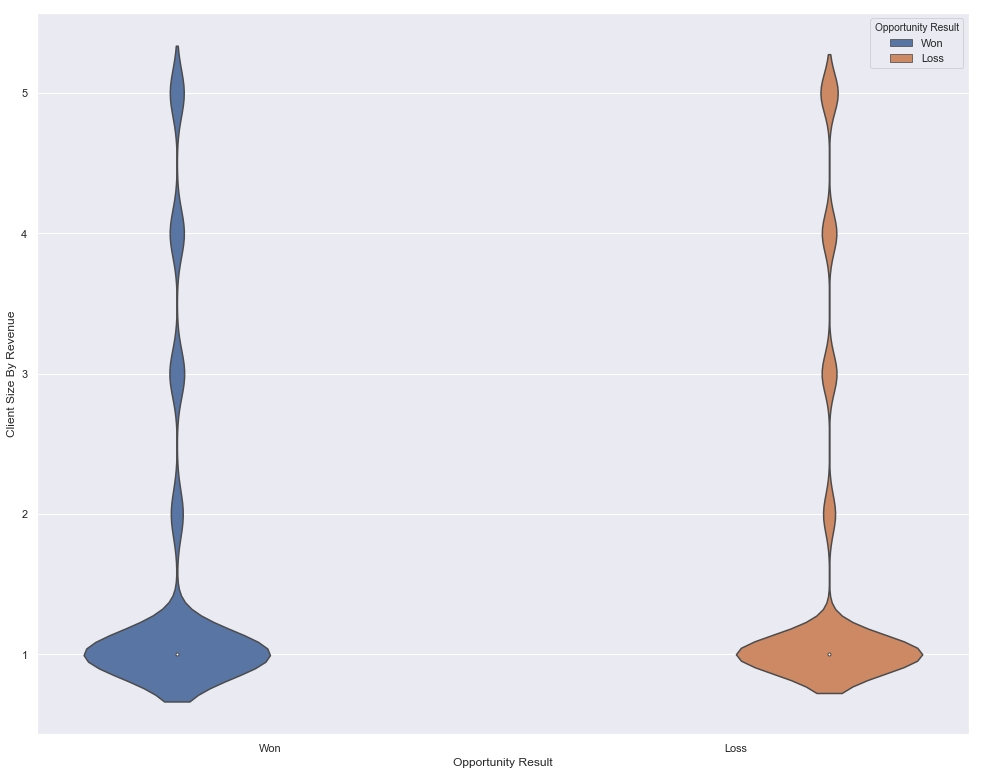

In [11]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

ow, that our plot is created, let’s see what it tells us. In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘won’ and ‘loss’ on the x-axis and the values of ‘Client Size By Revenue’ in the y-axis. The violin plot shows us that the largest distribution of data is in the client size ‘1’, and the rest of the client size labels have less data.

This violin plot gives us very valuable insight into how the data is distributed and which features and labels have the largest concentration of data, but there is more than what meets the eye in case of violin plots. You can dig deeper into the additional uses of violin plots via the official documentation of the Seaborn module

# E2. Change the font size in the violin plots.


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['50'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['50'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['50'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


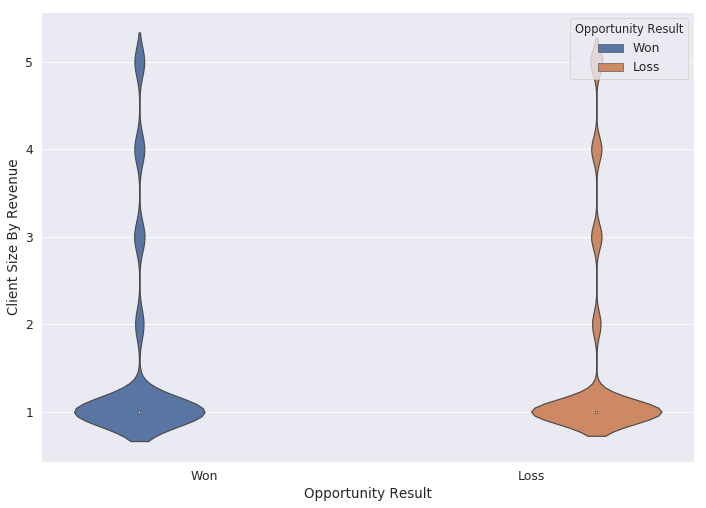

In [20]:
sns.set_context("paper", font_scale=1.4)
        
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

# Preprocessing Data
Now that we have a good understanding of what our data looks like, we can move towards preparing it to build prediction models using scikit-learn.

We saw in our initial exploration that most of the columns in our data set are strings, but the algorithms in scikit-learn understand only numeric data. Luckily, the scikit-learn library provides us with many methods for converting string data into numerical data. One such method is the LabelEncoder() method. We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’ into numerical labels. To visualize what we are trying to to achieve with the LabelEncoder() method let’s consider the images below.

The image below represents a dataframe that has one column named ‘color’ and three records ‘Red’, ‘Green’ and ‘Blue’.
  color
-------
#0-- Red
#1-- Green
#2-- Blue


Since the machine learning algorithms in scikit-learn understand only numeric inputs, we would like to convert the categorical labels like ‘Red, ‘Green’ and ‘Blue’ into numeric labels. When we are done converting the categorical labels in the original dataframe, we would get something like this:

# color
------
#0--1
#1--2
#2--3

Now, let’s start the actual conversion process. We will use the fit_transform() method provided by LabelEncoder() to encode the labels in the categorical column such as ‘Route To Market’ in the sales_data dataframe and convert them into numeric labels similar to what we visualized in the above diagrams. The fit_transform() function takes user defined labels as input and then returns encoded labels. Let’s go through a quick example to understand how the encoding is done. In the code example below we have a list of cities i.e. ["paris", "paris", "tokyo", "amsterdam"] and we will try to encode these string labels into something similar to this – [2, 2, 1,3].

In [22]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

print(encoded_value)

[1 1 2 0]


Voila! We have successfully converted the string labels into numeric labels. How’d we do that? First we imported the preprocessing module which provides the LabelEncoder() method. Then we created an object which represents the LabelEncoder() type. Next we used this object’s fit_transform() function to differentiate between different unique classes of the list ["paris", "paris", "tokyo", "amsterdam"] and then return a list with the respective encoded values, i.e. [1 1 2 0].

Notice how the LabelEncoder() method assigns the numeric values to the classes in the order of the first letter of the classes from the original list: “(a)msterdam” gets an encoding of ‘0’ , “(p)aris gets an encoding of 1” and “(t)okyo” gets an encoding of 2.

There are many more functions provided by LabelEncoder() that are handy under a variety of encoding requirements. We won’t need them here, but to learn more, a good place to start is the official page of scikit-learn where the LabelEncoder() and its related functions are described in detail.

# E3. Is the Label Encoder case sensitive? Show some code that demonstrates

to test if it is case sensitive I will make a new list with "paris" and "Paris". if the array gives me two different values for paris and Paris then it is case sensitive

In [25]:
encoded_value = le.fit_transform(["Paris", "paris", "tokyo", "amsterdam"])

print(encoded_value)

[0 2 3 1]


In [26]:
# Yes it is case sensitive

Since, we now have a good idea of how the LabelEncoder() works, we can move forward with using this method to encode the categorical labels from the sales_data dataframe and convert them into numeric labels. In the previous sections during the initial exploration of the data set we saw that the following columns contain string values: ‘Supplies Subgroup’, ‘Region’, ‘Route To Market’, ‘Opportunity Result’, ‘Competitor Type’, and ‘Supplies Group’. Before we start encoding these string labels, let’s take a quick look into the different labels that these columns contain:-

In [27]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


We have now laid out the different categorical columns from the sales_data dataframe and the unique classes under each of these columns. Now, it’s time to encode these strings into numeric labels. To do this, we will run the code below and then do a deep dive to understand how it works:

In [28]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


So what did we just do? First we imported the preprocessing module which provides the LabelEncoder() method. Then we created an object le of the type labelEncoder(). In the next couple of lines we used the fit_transform() function provided by LabelEncoder() and converted the categorical labels of different columns like ‘Supplies Subgroup’, ‘Region’, Route To Market’ into numeric labels. In doing this, we successfully converted all the categorical (string) columns into numeric values.

# E4. The tutorial suggests you write over your original data, changing the text to numerical data. Suppose you wanted to keep the classification text info, linking the numerical and text information. How would you do this?

you can hold the labels for each class using:
    classes_ : array of shape (n_class,)



In [30]:
list(le.classes_)

['Car Accessories',
 'Car Electronics',
 'Performance & Non-auto',
 'Tires & Wheels']

Now that we have our data prepared and converted it is almost ready to be used for building our predictive model. But we still need to do one critical thing:

# Training Set & Test Set

A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. For this we need to divide the entire data set into two sets. One is the training set on which we are going to train our algorithm to build a model. The other is the testing set on which we will test our model to see how accurate its predictions are.

But before doing all this splitting, let’s first separate our features and target variables. As before in this tutorial, we will first run the code below, and then take a closer look at what it does:

In [36]:
# select columns other than 'Opportunity Number','Opportunity Result'cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


# E5 Explain how the cols for loop works. What does this piece of code do? How does it do it

# E5 Answer
It selects all the columns except the column Opportunity Number, because that column is unnecessary since the number isnt a datapoint but more like a name

OK, so what did we just do? First, we don’t need the ‘Opportunity Number’ column as it is just a unique identifier for each record. Also, we want to predict the ‘Opportunity Result’, so it should be our ‘target’ rather than part of ‘data’. So, in the first line of the code above, we selected only the columns which didn’t match ‘Opportunity Number’and ‘Opportunity Result’ and assigned them to a variable cols. Next, we created a new dataframe data with the columns in the list cols. This will serve as our feature set. Then we took the ‘Opportunity Result’ column from the dataframe sales_data and created a new dataframe target.

That’s it! We are all set with defining our features and target into two separate dataframes. Next we will divide the dataframes data and target into training sets and testing sets. When splitting the data set we will keep 30% of the data as the test data and the remaining 70% as the training data. But keep in mind that those numbers are arbitrary and the best split will depend on the specific data you’re working with. If you’re not sure how to split your data, the 80/20 principle where you keep 80% of the data as training data and use the remaining 20% as test data is a decent default. However, for this tutorial, we are going to stick with our earlier decision of keeping aside 30% of the data as test data. 

In [48]:
# The train_test_split() method in scikit-learn can be used to split the data:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

With this, we have now successfully prepared a testing set and a training set. In the above code first we imported the train_test_split module. Next we used the train_test_split() method to divide the data into a training set (data_train,target_train) and a test set (data_test,data_train). The first argument of the train_test_split() method are the features that we separated out in the previous section, the second argument is the target(‘Opportunity Result’). The third argument ‘test_size’ is the percentage of the data that we want to separate out as training data . In our case it’s 30% , although this can be any number. The fourth argument ‘random_state’ just ensures that we get reproducible results every time.

Now, we have everything ready and here comes the most important and interesting part of this tutorial: building a prediction model using the vast library of algorithms available through scikit-learn.



# E6. What is the random_state in the train_test_split function? Hint: use the help files¶



In [43]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

# E6 Answer:
int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`
        
#the random_state ensures that we get reproduclible results ever time

# E7. What are the sizes of the data and target training and testing variables? What would you change to have 80% of the data used for training?

# E7 Answer
the sizes are all 30%. if you wanted to change it to 80% you would change the test_size:
#train_test_split(data,target, test_size = 0.80, random_state = 10)


# Building The Model
There’s a machine_learning_map available on scikit learn’s website that we can use as a quick reference when choosing an algorithm. It looks something like this:

ML-cheat-sheet-1

We can use this map as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category we fall:

More than 50 samples – Check
Are we predicting a category – Check
We have labeled data? ( data with clear names like opportunity amount etc.) – Check
Less than 100k samples – Check
Based on the checklist that we prepared above and going by the machine_learning_map we can try out the below mentioned algorithms.

Naive Bayes
Linear SVC
K-Neighbours Classifier
The real beauty of the scikit-learn library is that it exposes high level APIs for different algorithms, making it easier for us to try out different algorithms and compare the accuracy of the models to see what works best for our data set.

Let’s begin trying out the different algorithms one by one.



# Naive-Bayes
Scikit-learn provides a set of classification algorithms which “naively” assumes that in a data set every pair of features are independent. This assumption is the underlying principle of Bayes theorem. The algorithms based on this principle are known as Naive-Bayes algorithms.

On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability. Let’s try to understand this with a very simple problem statement: Will it rain today? Suppose we have a set of weather data with us that will be our feature set, and the probability of ‘Rain’ will be our target. Based on this feature set we can create a table to show us the number of times a particular feature/target pair occur. It would look something like this:

NB_occurancetable-1

In the table above the feature (column) ‘Weather’ contains the labels (‘Partially Cloudy’ and ‘Cloudy’) and the column ‘Rain’ contains the occurrence of rain coinciding with the feature ‘Weather’ (Yes/No). Whenever a feature lcoincides with rain, it’s recorded as a ‘Yes’ and when the feature didn’t lead to rain it is recorded as a ‘No’. We can now use the data from the occurrence table to create another table known as the ‘Frequency table’ where we can record the number of ‘Yes’ and the number of ‘No’ answers that each feature relates to:

NB-Frequency_Table

Finally, we combine the data from the ‘occurrence table’ and the ‘frequency table’ and create a ‘likelihood table’. This table lists the amount of ‘Yes’ and ‘No’ for each feature and then uses this data to calculate the probability of contibution of each feature towards the occurrence of rain:

NB-Probability_Table

Notice the ‘Individual Probability’ column in the table above. We had 6 occurrences of the features ‘Partially Cloudy’ and ‘Cloudy’ from the ‘Occurrence table’ and from the ‘Likelihood table’ it was clear that the feature ‘Partially Cloudy’ had 4 occurrences (2 for ‘No’ and 2 for ‘yes’). When we divide the number of occurrences of ‘No’ and ‘Yes’ of a particular feature with the ‘total’ of the ‘occurrence table’, we get the probability of that particular feature. In our case if we need to find out that which feature has the strongest probability of contributing to the occurrence of Rain then we take the total number of ‘No’ of each feature and add it to their respective number of ‘Yes’ from the ‘frequency table’ and then divide the sum with the ‘Total’ from the óccurances table’. This gives us the probability of each of these features coinciding with rain.

The algorithm that we are going to use for our sales data is the Gaussian Naive Bayes and it is based on a concept similar to the weather example we just explored above, although significantly more mathematically complicated. A more detailed explanation of ‘Naive-Bayes’ algorithms can be found here for those who wish to delve deeper.

Now let’s implement the Gaussian Naive Bayes or GaussianNB algorithm from scikit-learn to create our prediction model:



In [49]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())

#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


Now let’s take a closer look at what we just did. First, we imported the GaussianNB method and the accuracy_score method. Then we created an object gnb of the type GaussianNB. After this, we trained the algorithm on the testing data(data_train) and testing target(target_train) using the fit() method, and then predicted the targets in the test data using the predict() method. Finally we printed the score using the accuracy_score() method and with this we have successfully applied the Naive-Bayes algorithm to build a prediction model.

Now lets see how the other algorithms in our list perform as compared to the Naive-Bayes algorithm.



# E8. What does the Naive-Bayes accuracy mean? How do you interperet this? How would this business use the information?
# E8. Answer
#NB calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.
#you interpret the NB accuracy score as the probability that the Target result does occur, so the probability that our target, Opportunity Result, did occur is 0.759
#this would show the business how likely the other data contribute to whether sales are successful or not


# LinearSVC
LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. We won’t go into the intricacies of the mathematics involved in this class of algorithms, but on a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes. To get a clear understanding of this concept let’s imagine a data set of ‘dots’ and ‘squares’ divided into a two dimensional space along two axis, as shown in the image below:
In the image above a LinearSVC implementation tries to divide the two-dimensional space in such a way that the two classes of data i.e the dots and squares are clearly divided. Here the two lines visually represent the various division that the LinearSVC tries to implement to separate out the two available classes.

A very good writeup explaining a Support Vector Machine(SVM) can be found here for those who’d like more detail, but for now, let’s just dive in and get our hands dirty:


In [51]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ", accuracy_score(target_test, pred, normalize = True))


LinearSVC accuracy :  0.46355946684894056


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Similar to what we did during the implementation of GaussianNB, we imported the required modules in the first two lines. Then we created an object svc_model of type LinearSVC with random_state as ‘0’. Hold on! What is a “random_state” ? Simply put the random_state is an instruction to the built-in random number generator to shuffle the data in a specific order.

Next, we trained the LinearSVC on the training data and then predicted the target using the test data. Finally, we checked the accuracy score using the accuracy_score() method.

Now that we have tried out the GaussianNB and LinearSVC algorithms we will try out the last algorithm in our list and that’s the K-nearest neighbours classifier

# K-Neighbors Classifier
Compared to the previous two algorithms we’ve worked with, this classifier is a bit more complex. For the purposes of this tutorial we are better off using the KNeighborsClassifier class provided by scikit-learn without worrying much about how the algorithm works. (But if you’re interested, a very detailed explanation of this class of algorithms can be found here)

Now, let’s implement the K-Neighbors Classifier and see how it scores:

In [53]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


The above code can be explained just like the previous implementations. First we imported the necessary modules, then we created the object neigh of type KNeighborsClassifier with the number of neighbors being n_neighbors=3. Then we used the fit() method to train our algorithm on the training set, then we tested the model on the test data. Finally, we printed out the accuracy score.

Now that we have implemented all the algorithms in our list, we can simply compare the scores of all the models to select the model with the highest score. But wouldn’t it be nice if we had a way to visually compare the performance of the different models? We can use the yellowbrick library in scikit-learn, which provides methods for visually representing different scoring methods.